In [1]:
# Set Up Environment and Import Libraries
# Navigate to the yolov11 directory
import os
from ultralytics import YOLO
import torch
import yaml
from pathlib import Path
import random
from glob import glob
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from ultralytics import YOLO

# Set Random Seed and Device Configuration
# Set random seed for reproducibility
random_seed = 42
random.seed(random_seed)
torch.manual_seed(random_seed)

# Check if CUDA (GPU) is available and select the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")
print(torch.version.cuda)
torch.cuda.empty_cache()

print("torch.cuda.device_count():", torch.cuda.device_count())
for i in range(torch.cuda.device_count()):
    print(f"Device {i}: {torch.cuda.get_device_name(i)}")

Using device: cuda
12.4
torch.cuda.device_count(): 4
Device 0: NVIDIA RTX A5500
Device 1: NVIDIA RTX A5500
Device 2: NVIDIA RTX A5500
Device 3: NVIDIA RTX A5500


In [2]:
# Prepare Custom Data Configuration (VisDrone.yaml)
data_yaml_content = """
# VisDrone.yaml

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: VisDrone  # dataset root dir
train: VisDrone2019-DET-train/images  # train images (relative to 'path')  6471 images
val: VisDrone2019-DET-val/images  # val images (relative to 'path')  548 images
test: VisDrone2019-DET-test-dev/images  # test images (optional)  1610 images

# Classes
names:
  0: pedestrian
  1: people
  2: bicycle
  3: car
  4: van
  5: truck
  6: tricycle
  7: awning-tricycle
  8: bus
  9: motor
"""

# Save the configuration to a file
with open('VisDrone.yaml', 'w') as file:
    file.write(data_yaml_content)

In [3]:
# Train YOLOv11 on VisDrone Dataset
# Load a model
# model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolo11x.pt")  # load a pretrained model (recommended for training)

# Train the model
# results = model.train(data="VisDrone.yaml", epochs=5, imgsz=640)
# results = model.train(data="VisDrone.yaml", epochs=150, imgsz=640)
results = model.train(
    data="VisDrone.yaml",
    # epochs=5,
    # epochs=50,
    epochs=100,
    # epochs=150,
    # epochs=300,
    imgsz=640,
    # imgsz=720,
    # imgsz=1280,
    # imgsz=1536,
    # batch=8,  # Batch size
    # batch=32,  # Batch size
    # batch=64,  # Batch size
    # batch=72,  # Batch size
    batch=84,  # Batch size
    # batch=96,  # Batch size overload
    # batch=100,  # Batch size overload
    # batch=128,  # Batch size overload
    # device='0',  # Specify GPUs to use (GPUs 0)
    # device='0,1',  # Specify GPUs to use (GPUs 0 and 1)
    device='0,1,2,3',  # Specify GPUs to use (GPUs 0, 1, 2, 3)
    workers=8,  # Number of data loading workers
    # project='runs/detect',  # Project name
    # name='train',  # Experiment name
    exist_ok=False,  # Overwrite existing results
    verbose=True,  # Verbose output
    # optimizer='SGD',
    # optimizer='Adam',
    # optimizer='AdamW',
    # weight_decay=0.0005,
    # lr0=0.1,  # Initial learning rate
)

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A5500, 24138MiB)
                                                       CUDA:1 (NVIDIA RTX A5500, 24138MiB)
                                                       CUDA:2 (NVIDIA RTX A5500, 24138MiB)
                                                       CUDA:3 (NVIDIA RTX A5500, 24129MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=VisDrone.yaml, epochs=100, time=None, patience=100, batch=84, imgsz=640, save=True, save_period=-1, cache=False, device=0,1,2,3, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=Tru

train: Scanning /home/yxu33/ecgr8119/final_project/datasets/VisDrone/VisDrone2019-DET-train/labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]


train: WARNING ⚠️ /home/yxu33/ecgr8119/final_project/datasets/VisDrone/VisDrone2019-DET-train/images/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/yxu33/ecgr8119/final_project/datasets/VisDrone/VisDrone2019-DET-train/images/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/yxu33/ecgr8119/final_project/datasets/VisDrone/VisDrone2019-DET-train/images/9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/yxu33/ecgr8119/final_project/datasets/VisDrone/VisDrone2019-DET-train/images/9999987_00000_d_0000049.jpg: 1 duplicate labels removed


val: Scanning /home/yxu33/ecgr8119/final_project/datasets/VisDrone/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.00065625), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 32 dataloader workers
Logging results to runs/detect/train12
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      24.1G      1.385       1.65     0.9659         18        640: 100%|██████████| 78/78 [00:56<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.93it/s]


                   all        548      38759      0.325      0.246      0.221      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      23.5G      1.342       1.09     0.9516         38        640: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.53it/s]


                   all        548      38759      0.298      0.241      0.194      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      23.2G      1.361      1.082     0.9561         51        640: 100%|██████████| 78/78 [00:42<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.53it/s]


                   all        548      38759      0.259      0.253      0.177     0.0948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        24G      1.391      1.089     0.9553         24        640: 100%|██████████| 78/78 [00:49<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.82it/s]


                   all        548      38759      0.341      0.263      0.235      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      23.5G      1.332      1.021     0.9467        103        640: 100%|██████████| 78/78 [00:42<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.99it/s]


                   all        548      38759      0.404       0.31      0.304      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      23.7G      1.301     0.9589     0.9375        111        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]


                   all        548      38759      0.439      0.344      0.333      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      23.8G      1.275     0.9357     0.9275         80        640: 100%|██████████| 78/78 [01:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]


                   all        548      38759      0.445      0.339      0.341      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      23.4G      1.272     0.9226     0.9311        173        640: 100%|██████████| 78/78 [00:42<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.08it/s]


                   all        548      38759      0.463      0.339      0.345      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      23.3G       1.26     0.9042     0.9185         24        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]


                   all        548      38759      0.476      0.359      0.364      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      24.3G      1.243     0.8767     0.9166         98        640: 100%|██████████| 78/78 [00:51<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.95it/s]


                   all        548      38759      0.466      0.375      0.375      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      24.4G      1.243     0.9006     0.9158         78        640: 100%|██████████| 78/78 [00:42<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.04it/s]


                   all        548      38759      0.485      0.383      0.385       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      23.7G      1.231     0.8747     0.9147         57        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.04it/s]


                   all        548      38759      0.512      0.389      0.399      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      23.9G      1.213     0.8396      0.911         39        640: 100%|██████████| 78/78 [00:56<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]


                   all        548      38759      0.493      0.379      0.388      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      23.9G      1.219     0.8449      0.908         63        640: 100%|██████████| 78/78 [00:49<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.09it/s]


                   all        548      38759      0.496      0.382      0.388      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      23.6G      1.206     0.8494     0.9051         30        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]


                   all        548      38759      0.493      0.383      0.394       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        23G      1.098     0.8388     0.8745       1238        640:   3%|▎         | 2/78 [00:01<00:50,  1.49it/s]

     16/100      24.1G      1.208     0.8243     0.9096         45        640: 100%|██████████| 78/78 [00:50<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.09it/s]


                   all        548      38759      0.518      0.408      0.417      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      23.6G      1.184     0.8172     0.9028         63        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]


                   all        548      38759      0.528      0.396       0.41      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      23.1G       1.17     0.8049     0.9026         92        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.06it/s]


                   all        548      38759      0.523      0.406      0.421      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      24.2G      1.165     0.7895     0.8999         55        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.10it/s]


                   all        548      38759      0.528      0.404       0.42      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      23.6G      1.161     0.7887     0.8955         25        640: 100%|██████████| 78/78 [00:49<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.09it/s]


                   all        548      38759      0.552       0.41      0.434      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      23.9G      1.152     0.7784     0.8976        105        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.10it/s]


                   all        548      38759      0.543       0.42      0.439      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      24.2G      1.154     0.7655     0.8911        204        640: 100%|██████████| 78/78 [00:59<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.11it/s]


                   all        548      38759       0.52      0.419       0.43      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      24.1G      1.144     0.7574      0.893         11        640: 100%|██████████| 78/78 [00:49<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.95it/s]


                   all        548      38759      0.552      0.419      0.442      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      23.4G      1.138     0.7728     0.8915         52        640: 100%|██████████| 78/78 [00:42<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.09it/s]


                   all        548      38759      0.531      0.414      0.429      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      23.3G       1.14     0.7484     0.8915         77        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.11it/s]


                   all        548      38759      0.565      0.417      0.441      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      23.9G      1.132     0.7401     0.8914        128        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]


                   all        548      38759      0.548      0.434      0.449      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.54G      1.125     0.7428     0.8887         33        640: 100%|██████████| 78/78 [00:42<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]


                   all        548      38759      0.553      0.435      0.446      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      23.2G      1.136     0.7465     0.8892         98        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.10it/s]


                   all        548      38759      0.554      0.436      0.452       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      24.4G      1.128       0.73     0.8877         75        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]


                   all        548      38759      0.564      0.433      0.453      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      23.3G      1.129     0.7158      0.886        105        640: 100%|██████████| 78/78 [00:50<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]


                   all        548      38759      0.563      0.437      0.459      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      22.7G      1.126      0.728     0.8871       2005        640:  49%|████▊     | 38/78 [00:21<00:22,  1.79it/s]

     31/100      23.1G      1.124     0.7229     0.8848         65        640: 100%|██████████| 78/78 [00:51<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]


                   all        548      38759      0.562       0.44      0.461      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      23.3G      1.094     0.7034     0.8805        113        640: 100%|██████████| 78/78 [00:50<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]


                   all        548      38759      0.569      0.445      0.464      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      23.4G      1.108     0.7158     0.8895         31        640: 100%|██████████| 78/78 [00:43<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]


                   all        548      38759      0.572      0.442      0.463      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      23.8G       1.11     0.7024     0.8819       1665        640:  79%|███████▉  | 62/78 [00:34<00:08,  1.81it/s]

     34/100      2.49G      1.108     0.7029     0.8812         37        640: 100%|██████████| 78/78 [00:50<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.04it/s]


                   all        548      38759      0.561      0.447      0.461      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      24.3G      1.101     0.7009     0.8813         95        640: 100%|██████████| 78/78 [00:42<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.11it/s]


                   all        548      38759      0.584      0.447      0.466      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      23.8G      1.117     0.7121     0.8824        194        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.10it/s]


                   all        548      38759      0.578      0.433      0.463      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      23.9G      1.102     0.6937     0.8861         46        640: 100%|██████████| 78/78 [00:43<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.11it/s]


                   all        548      38759      0.567      0.449      0.464      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      23.2G      1.096     0.6849     0.8792        228        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.10it/s]


                   all        548      38759      0.554      0.452      0.464      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      23.3G      1.091     0.6872     0.8852         67        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.09it/s]


                   all        548      38759      0.574      0.446      0.467      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      23.9G      1.067     0.6715     0.8756       1253        640:  32%|███▏      | 25/78 [00:14<00:29,  1.82it/s]

     40/100      23.1G      1.071     0.6753     0.8745       2154        640:  53%|█████▎    | 41/78 [00:29<00:20,  1.79it/s]

     40/100      2.54G      1.072     0.6729     0.8735        109        640: 100%|██████████| 78/78 [01:01<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]


                   all        548      38759      0.578      0.449       0.47      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      23.6G      1.083      0.672     0.8759         36        640: 100%|██████████| 78/78 [00:50<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]


                   all        548      38759      0.586      0.453      0.471      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      23.8G      1.092     0.6776     0.8717         92        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]


                   all        548      38759      0.577      0.439      0.462      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      24.4G      1.086     0.6752     0.8754         67        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.10it/s]


                   all        548      38759      0.579      0.448      0.469      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      23.3G      1.079     0.6656     0.8709        153        640: 100%|██████████| 78/78 [00:59<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]


                   all        548      38759       0.57       0.45      0.467       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      23.5G      1.071     0.6619     0.8763         64        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.16it/s]


                   all        548      38759      0.582      0.446      0.466      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      24.4G       1.06     0.6536     0.8737         92        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.11it/s]


                   all        548      38759      0.584      0.448      0.471      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      24.4G      1.071     0.6525      0.871        210        640: 100%|██████████| 78/78 [00:42<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]


                   all        548      38759      0.569      0.457      0.474      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        24G      1.063     0.6453     0.8705        144        640: 100%|██████████| 78/78 [00:42<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]


                   all        548      38759      0.579      0.452      0.471      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      23.4G      1.051      0.642     0.8733        107        640: 100%|██████████| 78/78 [00:42<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.01it/s]


                   all        548      38759       0.59      0.446      0.473      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      23.4G      1.052     0.6345     0.8664        167        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.99it/s]


                   all        548      38759      0.589      0.451      0.477      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100        24G      1.048     0.6236     0.8674         42        640: 100%|██████████| 78/78 [00:49<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]


                   all        548      38759      0.594      0.448      0.475      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      24.2G      1.048     0.6263     0.8719         79        640: 100%|██████████| 78/78 [00:51<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]


                   all        548      38759      0.585      0.458      0.475      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      23.8G      1.046     0.6284     0.8677        142        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.08it/s]


                   all        548      38759      0.575      0.453      0.472      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      23.8G      1.033     0.6119     0.8675         99        640: 100%|██████████| 78/78 [00:43<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.08it/s]


                   all        548      38759      0.583      0.455      0.473      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      24.5G      1.058     0.6239     0.8676        163        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.08it/s]


                   all        548      38759      0.585      0.454      0.478      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      23.4G      1.036     0.6145     0.8644        122        640: 100%|██████████| 78/78 [00:43<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.08it/s]


                   all        548      38759      0.582      0.456      0.476      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100        24G      1.048     0.6206     0.8669        115        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]


                   all        548      38759      0.589      0.445      0.474      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      23.9G      1.047     0.6075     0.8669         19        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]


                   all        548      38759      0.585      0.457      0.476      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      23.4G      1.042     0.6045     0.8644         72        640: 100%|██████████| 78/78 [00:49<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]


                   all        548      38759      0.589      0.449      0.474      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.46G      1.027     0.5963     0.8662         60        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.05it/s]


                   all        548      38759      0.581      0.454      0.472      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      24.1G      1.021     0.5895     0.8599         71        640: 100%|██████████| 78/78 [00:42<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.01it/s]


                   all        548      38759      0.584      0.452      0.477      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      23.7G      1.016      0.587     0.8627         96        640: 100%|██████████| 78/78 [00:49<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]


                   all        548      38759       0.59      0.454      0.478      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      23.1G      1.016     0.5888     0.8627         38        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]


                   all        548      38759      0.589      0.455      0.478      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      22.6G      1.017     0.5868     0.8621         92        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]


                   all        548      38759        0.6       0.45      0.479      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      23.4G      1.003     0.5755     0.8592         41        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]


                   all        548      38759      0.589      0.455      0.476      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      24.1G      1.011     0.5739     0.8589         33        640: 100%|██████████| 78/78 [00:56<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]


                   all        548      38759      0.592      0.457      0.476      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      23.3G       1.01     0.5762      0.858         73        640: 100%|██████████| 78/78 [00:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.16it/s]


                   all        548      38759      0.595      0.456      0.475      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      24.4G     0.9995     0.5652     0.8558         55        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]


                   all        548      38759      0.604      0.458      0.481      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      23.1G      0.991     0.5601     0.8559         38        640: 100%|██████████| 78/78 [00:58<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]


                   all        548      38759      0.594      0.458      0.478      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      24.1G     0.9886     0.5566     0.8567        173        640: 100%|██████████| 78/78 [00:51<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]


                   all        548      38759      0.594      0.459       0.48      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      24.2G      1.004     0.5672     0.8577         14        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]


                   all        548      38759      0.597      0.457      0.479      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      23.2G     0.9875     0.5517     0.8559         90        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]


                   all        548      38759      0.573      0.459      0.473      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      23.5G      1.014     0.5572     0.8556         88        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]


                   all        548      38759      0.593      0.459      0.477      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      24.3G     0.9853     0.5488     0.8502       2300        640:  42%|████▏     | 33/78 [00:18<00:24,  1.82it/s]

     74/100      23.5G     0.9852     0.5459     0.8522         63        640: 100%|██████████| 78/78 [00:50<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]


                   all        548      38759        0.6      0.455      0.478      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      23.5G     0.9743     0.5401     0.8531         33        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]


                   all        548      38759      0.593      0.452      0.474      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      23.5G     0.9812     0.5415     0.8529        117        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.16it/s]


                   all        548      38759      0.595      0.459      0.478      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      23.6G     0.9881     0.5429     0.8518       1733        640:  71%|███████   | 55/78 [00:30<00:12,  1.81it/s]

     77/100        24G      0.991     0.5463     0.8515         89        640: 100%|██████████| 78/78 [00:49<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.17it/s]


                   all        548      38759      0.596      0.459      0.478      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      24.4G     0.9787     0.5446     0.8502         43        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]


                   all        548      38759      0.583      0.458      0.474      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.52G     0.9653     0.5291     0.8491         21        640: 100%|██████████| 78/78 [00:49<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]


                   all        548      38759        0.6      0.454      0.476      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      23.1G     0.9628      0.528     0.8475         54        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]


                   all        548      38759      0.605      0.449      0.476      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      24.2G     0.9697     0.5264     0.8509         99        640: 100%|██████████| 78/78 [00:50<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]


                   all        548      38759      0.594      0.459      0.477      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      23.3G     0.9646     0.5209     0.8494        110        640: 100%|██████████| 78/78 [00:42<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]


                   all        548      38759      0.598      0.457       0.48      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      23.6G     0.9494     0.5175     0.8462         81        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.16it/s]


                   all        548      38759      0.593      0.456      0.476      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      24.4G     0.9617     0.5169     0.8462         33        640: 100%|██████████| 78/78 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]


                   all        548      38759      0.599      0.457      0.477      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      23.4G     0.9633     0.5185      0.848        115        640: 100%|██████████| 78/78 [01:05<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.05it/s]


                   all        548      38759      0.595      0.453      0.475      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      23.1G     0.9434     0.5069     0.8495         48        640: 100%|██████████| 78/78 [00:42<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.16it/s]


                   all        548      38759      0.587      0.462      0.474      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      23.1G     0.9348     0.4995     0.8408       1971        640:  22%|██▏       | 17/78 [00:09<00:34,  1.76it/s]

     87/100      22.6G     0.9383     0.4996     0.8431       2026        640:  32%|███▏      | 25/78 [00:21<00:38,  1.37it/s]

     87/100      23.6G     0.9549     0.5091     0.8467         96        640: 100%|██████████| 78/78 [00:56<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.04it/s]


                   all        548      38759      0.591      0.458      0.475      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      23.7G     0.9434     0.5043     0.8456        181        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.16it/s]


                   all        548      38759      0.598      0.456      0.475      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      23.4G     0.9444     0.5027     0.8463         13        640: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]


                   all        548      38759      0.584       0.46      0.474      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      24.3G     0.9466     0.5087      0.846       1808        640:  23%|██▎       | 18/78 [00:10<00:32,  1.82it/s]

     90/100      23.3G     0.9551     0.5098     0.8456       1888        640:  33%|███▎      | 26/78 [00:23<00:39,  1.30it/s]

     90/100      23.5G      0.948     0.5053     0.8466         41        640: 100%|██████████| 78/78 [00:58<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.19it/s]


                   all        548      38759      0.588      0.463      0.475      0.296
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      23.3G     0.9213     0.4811     0.8477         14        640: 100%|██████████| 78/78 [00:50<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.17it/s]


                   all        548      38759      0.597      0.456      0.474      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        23G     0.9092      0.474     0.8434         15        640: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]


                   all        548      38759      0.587      0.457       0.47      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        23G     0.9297     0.4812     0.8465        955        640:  63%|██████▎   | 49/78 [00:26<00:15,  1.85it/s]

     93/100      23.3G     0.9352     0.4875     0.8473          8        640: 100%|██████████| 78/78 [00:48<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.16it/s]


                   all        548      38759        0.6      0.451      0.471      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      23.3G     0.9155     0.4791     0.8408         26        640: 100%|██████████| 78/78 [00:50<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.18it/s]


                   all        548      38759      0.587       0.46      0.472      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      22.7G     0.9209     0.4735     0.8426         45        640: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]


                   all        548      38759      0.586      0.461      0.471      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.56G     0.9123     0.4717     0.8475         22        640: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.05it/s]


                   all        548      38759      0.584      0.457      0.471      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      23.2G     0.9105     0.4703      0.842       1226        640:  91%|█████████ | 71/78 [00:38<00:03,  1.84it/s]

     97/100      22.9G     0.9073     0.4697     0.8407         23        640: 100%|██████████| 78/78 [00:48<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.16it/s]


                   all        548      38759       0.59      0.458      0.471      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      23.5G     0.9218     0.4743      0.843         48        640: 100%|██████████| 78/78 [00:41<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.04it/s]


                   all        548      38759      0.589      0.459      0.471      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      23.7G     0.8943     0.4624     0.8428         12        640: 100%|██████████| 78/78 [00:49<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.19it/s]


                   all        548      38759      0.592      0.458      0.471      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100        24G     0.8931     0.4559     0.8413        980        640:  74%|███████▍  | 58/78 [00:31<00:10,  1.85it/s]

    100/100      22.8G     0.9088     0.4712     0.8394         59        640: 100%|██████████| 78/78 [00:49<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.18it/s]


                   all        548      38759      0.591      0.458      0.471      0.293

100 epochs completed in 1.419 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 114.4MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A5500, 24138MiB)
                                                       CUDA:1 (NVIDIA RTX A5500, 24138MiB)
                                                       CUDA:2 (NVIDIA RTX A5500, 24138MiB)
                                                       CUDA:3 (NVIDIA RTX A5500, 24129MiB)
YOLO11x summary (fused): 464 layers, 56,838,574 parameters, 0 gradients, 194.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]


                   all        548      38759      0.602      0.459      0.481      0.299
            pedestrian        520       8844      0.674      0.461      0.536      0.264
                people        482       5125      0.675      0.342      0.411      0.173
               bicycle        364       1287      0.382      0.246      0.238      0.114
                   car        515      14064      0.808      0.798      0.836      0.618
                   van        421       1975      0.615      0.492      0.514      0.377
                 truck        266        750        0.6      0.472      0.476       0.33
              tricycle        337       1045      0.505      0.422      0.393      0.229
       awning-tricycle        220        532      0.334      0.229      0.201      0.133
                   bus        131        251      0.837      0.594      0.661       0.49
                 motor        485       4886      0.588       0.53      0.546      0.266
Speed: 0.0ms preproce

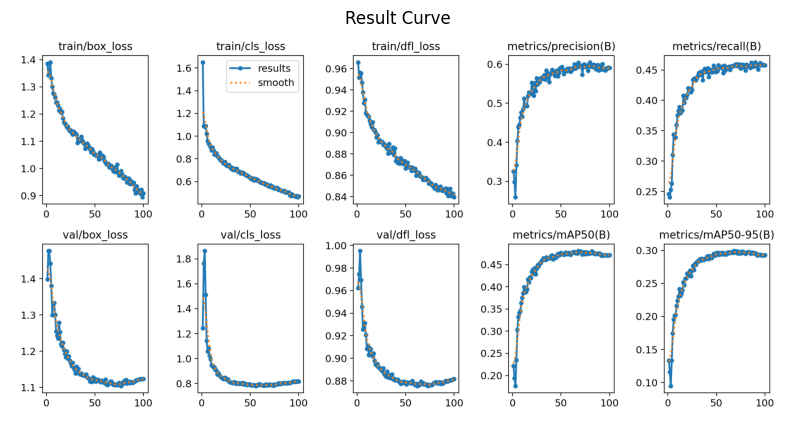

In [4]:
# Display the result curve
%matplotlib inline
# result_curve_path = 'runs/detect/train/results.png'  # load test confusion matrix img path
result_curve_path = 'runs/detect/train12/results.png'  # load test confusion matrix img path

if os.path.exists(result_curve_path):
    img = mpimg.imread(result_curve_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Result Curve')
    plt.show()
else:
    print('Result curve image not found.')

In [5]:
# Evaluate and Test the Model

# Set the image directory and model path
image_dir = 'datasets/VisDrone/VisDrone2019-DET-test-dev/images/'  # load test-dev dataset path
# model_path = 'runs/detect/train/weights/best.pt'  # load trained model path
model_path = 'runs/detect/train12/weights/best.pt'  # load trained model path

# Load the custom YOLOv11 model
model = YOLO(model_path)

In [6]:
# Evaluate the model on the test-dev dataset
metrics = model.val(data='VisDrone.yaml', split='test', imgsz=640)

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A5500, 24138MiB)
YOLO11x summary (fused): 464 layers, 56,838,574 parameters, 0 gradients, 194.5 GFLOPs


val: Scanning /home/yxu33/ecgr8119/final_project/datasets/VisDrone/VisDrone2019-DET-test-dev/labels.cache... 1610 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1610/1610 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:18<00:00,  5.56it/s]


                   all       1610      75102      0.526      0.393      0.386       0.23
            pedestrian       1197      21006      0.604      0.312      0.348      0.149
                people        797       6376      0.579      0.137      0.183     0.0663
               bicycle        377       1302      0.315      0.183      0.153     0.0681
                   car       1530      28074      0.743      0.758      0.771      0.499
                   van       1168       5771       0.51      0.446       0.44      0.297
                 truck        750       2659      0.557      0.504      0.494      0.329
              tricycle        245        530      0.314      0.357      0.249      0.141
       awning-tricycle        233        599      0.411      0.247      0.219      0.135
                   bus        838       2940      0.745      0.567      0.625      0.452
                 motor        794       5845      0.487      0.422      0.378      0.161
Speed: 0.1ms preproce

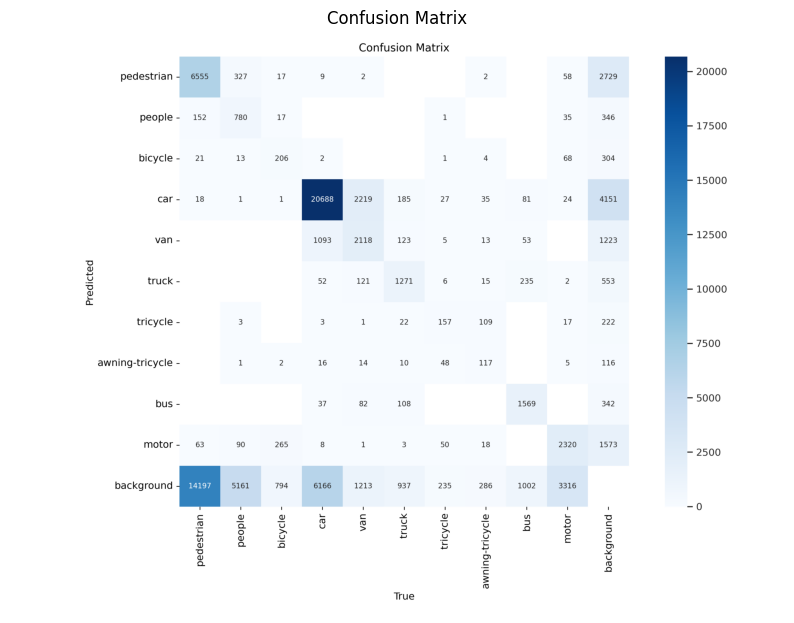

In [7]:
# Display the test confusion matrix
%matplotlib inline
confusion_matrix_path = 'runs/detect/val12/confusion_matrix.png'  # load test confusion matrix img path

if os.path.exists(confusion_matrix_path):
    img = mpimg.imread(confusion_matrix_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print('Confusion matrix image not found.')


image 1/1 /home/yxu33/ecgr8119/final_project/datasets/VisDrone/VisDrone2019-DET-test-dev/images/9999938_00000_d_0000129.jpg: 384x640 11 pedestrians, 9 cars, 2 vans, 2 trucks, 30.8ms
Speed: 0.8ms preprocess, 30.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


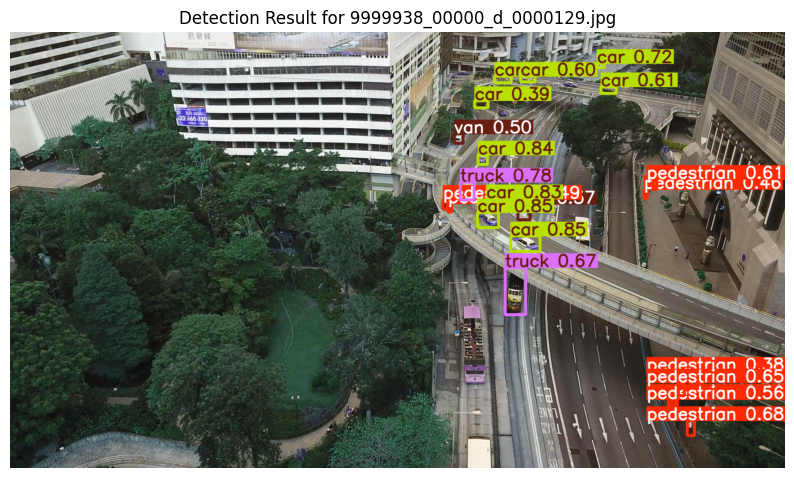


image 1/1 /home/yxu33/ecgr8119/final_project/datasets/VisDrone/VisDrone2019-DET-test-dev/images/9999938_00000_d_0000430.jpg: 384x640 28 cars, 1 van, 2 trucks, 5 buss, 8.9ms
Speed: 0.8ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


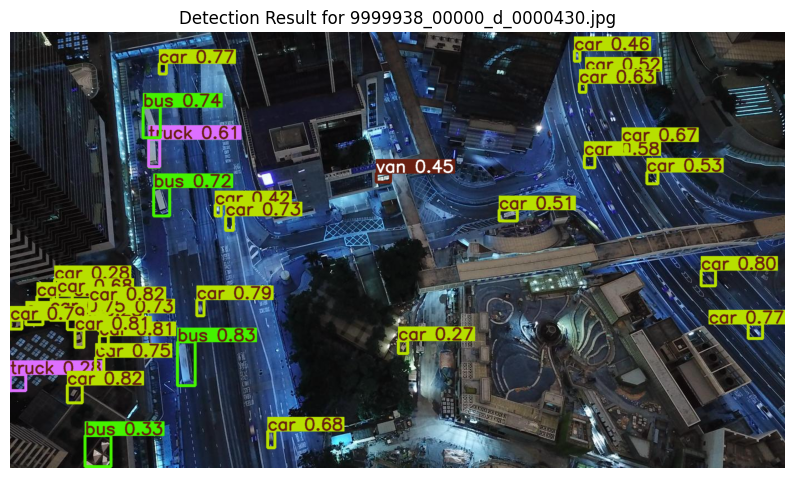


image 1/1 /home/yxu33/ecgr8119/final_project/datasets/VisDrone/VisDrone2019-DET-test-dev/images/0000282_00000_d_0000001.jpg: 384x640 3 cars, 1 truck, 8.9ms
Speed: 0.9ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


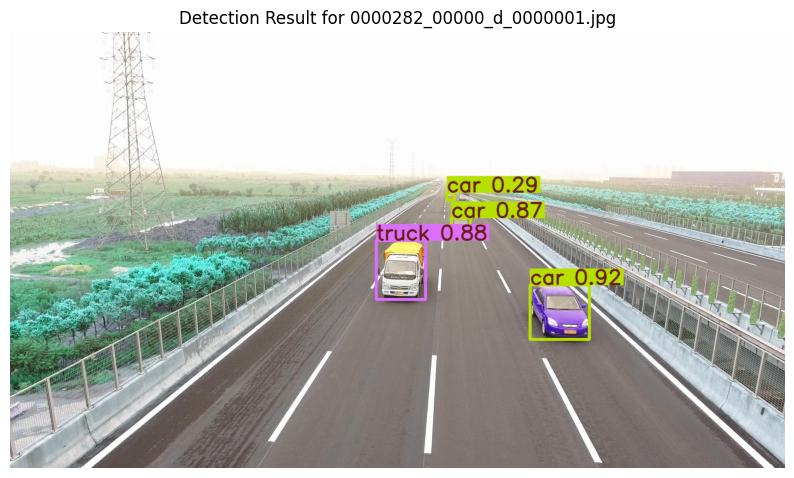


image 1/1 /home/yxu33/ecgr8119/final_project/datasets/VisDrone/VisDrone2019-DET-test-dev/images/0000265_05000_d_0000011.jpg: 384x640 14 pedestrians, 1 people, 10 bicycles, 27 cars, 8 vans, 2 tricycles, 46 motors, 8.9ms
Speed: 0.8ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


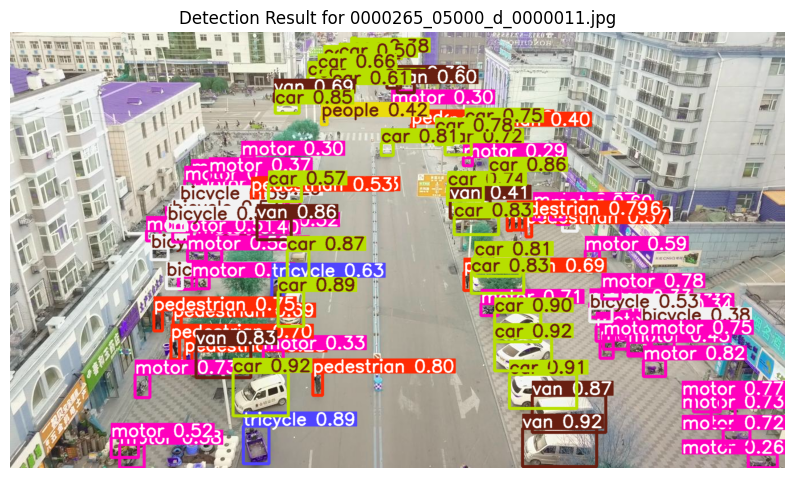


image 1/1 /home/yxu33/ecgr8119/final_project/datasets/VisDrone/VisDrone2019-DET-test-dev/images/9999938_00000_d_0000063.jpg: 384x640 1 pedestrian, 4 cars, 2 vans, 1 truck, 6 buss, 8.9ms
Speed: 1.0ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


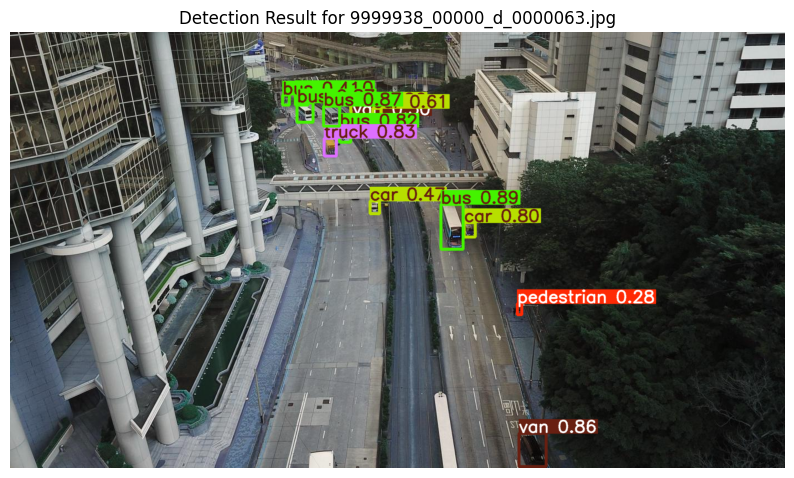

In [8]:
# Get the list of image files in the test dataset
%matplotlib inline
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

# Randomly select 5 images
sample_images = random.sample(image_files, 5)

# Run inference on each selected image and display the results
for img_file in sample_images:
    img_path = os.path.join(image_dir, img_file)
    
    # Run inference
    results = model.predict(source=img_path, save=False, imgsz=640)
    
    # Get the result and plot the detections
    result = results[0]
    detection_image = result.plot()
    
    # Display the detection result
    plt.figure(figsize=(10, 10))
    plt.imshow(detection_image)
    plt.axis('off')
    plt.title(f'Detection Result for {img_file}')
    plt.show()